In [3]:
import numpy as np
import pandas as pd

import urllib.request
from PIL import Image

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, KFold
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("data_diamonds/diamonds_train.csv", index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


## Por las características del target (price), utilizamos un modelo de REGRESIÓN

In [6]:
df.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [7]:
df.color.unique()

array(['H', 'D', 'F', 'G', 'I', 'E', 'J'], dtype=object)

In [8]:
df.clarity.unique()

array(['VS2', 'VVS2', 'VS1', 'IF', 'SI1', 'SI2', 'VVS1', 'I1'],
      dtype=object)

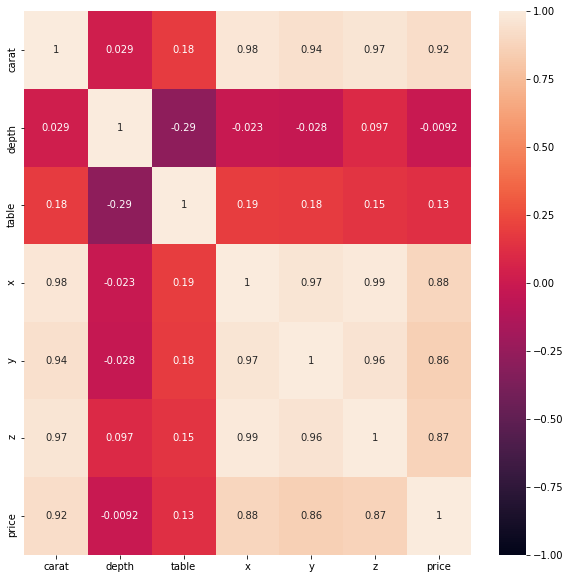

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True, vmax=1, vmin=-1);

In [10]:
df[df.carat == 2].nunique()

carat        1
cut          5
color        7
clarity      6
depth       79
table       18
x           57
y           64
z           47
price      172
dtype: int64

In [11]:
df[(df.depth == 65)&(df.clarity == 'SI1')].sort_values(['carat', 'price'], ascending = False)

,carat,cut,color,clarity,depth,table,x,y,z,price
18865,2.00,Ideal,H,SI1,65.0,61.0,7.90,7.79,5.11,18604
749,1.51,Fair,G,SI1,65.0,59.0,6.99,7.07,4.57,8681
30268,1.50,Fair,H,SI1,65.0,57.0,7.10,7.06,4.60,6838
18774,1.21,Fair,J,SI1,65.0,59.0,6.64,6.57,4.29,4147
481,1.01,Fair,D,SI1,65.0,57.0,6.30,6.22,4.07,5385
31401,0.91,Fair,E,SI1,65.0,62.0,6.09,6.04,3.94,4256
27755,0.90,Good,G,SI1,65.0,57.0,5.96,6.01,3.89,3615
27549,0.90,Fair,E,SI1,65.0,61.0,6.05,6.02,3.92,3332
35755,0.71,Fair,G,SI1,65.0,58.0,5.57,5.53,3.61,2045
36073,0.70,Good,H,SI1,65.0,57.0,5.52,5.59,3.61,2117


In [12]:
df[(df.cut == 'Very Good') & (df.color == 'G') & (df.carat == 2) & (df.clarity == 'SI1')].sort_values(['price'], ascending = False).head(30)

,carat,cut,color,clarity,depth,table,x,y,z,price
21198,2.0,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818
39169,2.0,Very Good,G,SI1,61.8,61.0,8.00,8.09,4.97,18524
31630,2.0,Very Good,G,SI1,62.5,58.0,7.98,8.04,5.01,18186


In [13]:
df.sort_values(['price'], ascending= False)

,carat,cut,color,clarity,depth,table,x,y,z,price
21198,2.00,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818
11620,1.51,Ideal,G,IF,61.7,55.0,7.37,7.41,4.56,18806
18831,2.00,Very Good,H,SI1,62.8,57.0,7.95,8.00,5.01,18803
32035,2.29,Premium,I,SI1,61.8,59.0,8.52,8.45,5.24,18797
40285,2.00,Premium,I,VS1,60.8,59.0,8.13,8.02,4.91,18795
...,...,...,...,...,...,...,...,...,...,...
5759,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,337
37476,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336
4163,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
31702,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326


C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

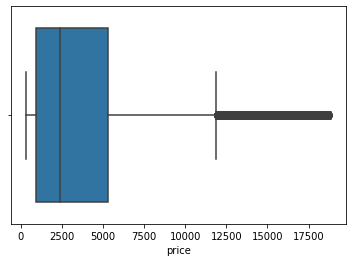

In [14]:
sns.boxplot(df['price'])

In [15]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997
...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965


In [16]:
df.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [17]:
cut_conditions = [(df.cut == 'Fair'), (df.cut == 'Good'), (df.cut == 'Very Good'), (df.cut == 'Premium'), (df.cut == 'Ideal')]
cut_eleccion = [1, 2, 3, 4, 5]
df['cut_ponderado'] = np.select(cut_conditions, cut_eleccion)

In [18]:
color_conditions = [(df.color == 'D'), (df.color == 'E'), (df.color == 'F'), (df.color == 'G'), (df.color == 'H'), (df.color == 'I'), (df.color == 'J')]
color_eleccion = [7, 6, 5, 4, 3, 2, 1]
df['color_ponderado'] = np.select(color_conditions, color_eleccion)

In [19]:
df.clarity.nunique()

8

In [20]:
clarity_conditions = [(df.clarity == 'I1'), (df.clarity == 'SI2'), (df.clarity == 'SI1'), (df.clarity == 'VS2'), (df.clarity == 'VS1'), (df.clarity == 'VVS2'), (df.clarity == 'VVS1'), (df.clarity == 'IF')]
clarity_eleccion = [1, 2, 3, 4, 5, 6, 7, 8]
df['clarity_ponderado'] = np.select(clarity_conditions, clarity_eleccion)

In [21]:
print(df.depth.max())
print(df.depth.min())

79.0
43.0


61.0
62.5
61.75041269054405
C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


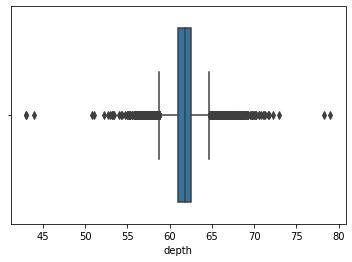

In [22]:
sns.boxplot(df.depth)
print(df.depth.quantile(0.25))
print(df.depth.quantile(0.75))
print(df.depth.mean())

In [23]:
depth_conditions =   [((df.depth > 59.5) & (df.depth < 62.9)),
                    ((df.depth > 56.2) & (df.depth < 59.5)) | ((df.depth > 62.9) & (df.depth < 65)), 
                    ((df.depth > 53.2) & (df.depth < 56.2)) | ((df.depth > 65) & (df.depth < 68))]
depth_eleccion = [4, 3, 2]
df['depth_ponderado'] = np.select(depth_conditions, depth_eleccion, default= 1)

In [24]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_ponderado,color_ponderado,clarity_ponderado,depth_ponderado
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,5,3,4,3
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,3,7,6,3
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,4,5,5,4
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,5,3,8,4
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,2,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40340,1.55,Premium,H,VS2,61.3,61.0,7.46,7.39,4.55,11708,4,3,4,4
40341,0.36,Ideal,D,SI1,60.6,56.0,4.58,4.63,2.79,619,5,7,3,4
40342,0.57,Very Good,I,VS2,62.2,55.0,5.33,5.34,3.32,1267,3,2,4,4
40343,1.01,Very Good,F,IF,59.6,62.0,6.47,6.56,3.88,9965,3,5,8,4


In [25]:
dummies_cut = pd.get_dummies(df["cut"], prefix='dummie')
dummies_color = pd.get_dummies(df["color"], prefix='dummie')
dummies_clarity = pd.get_dummies(df["clarity"], prefix='dummie')

In [26]:
df = pd.concat([df, dummies_cut, dummies_color, dummies_clarity], axis = 1)

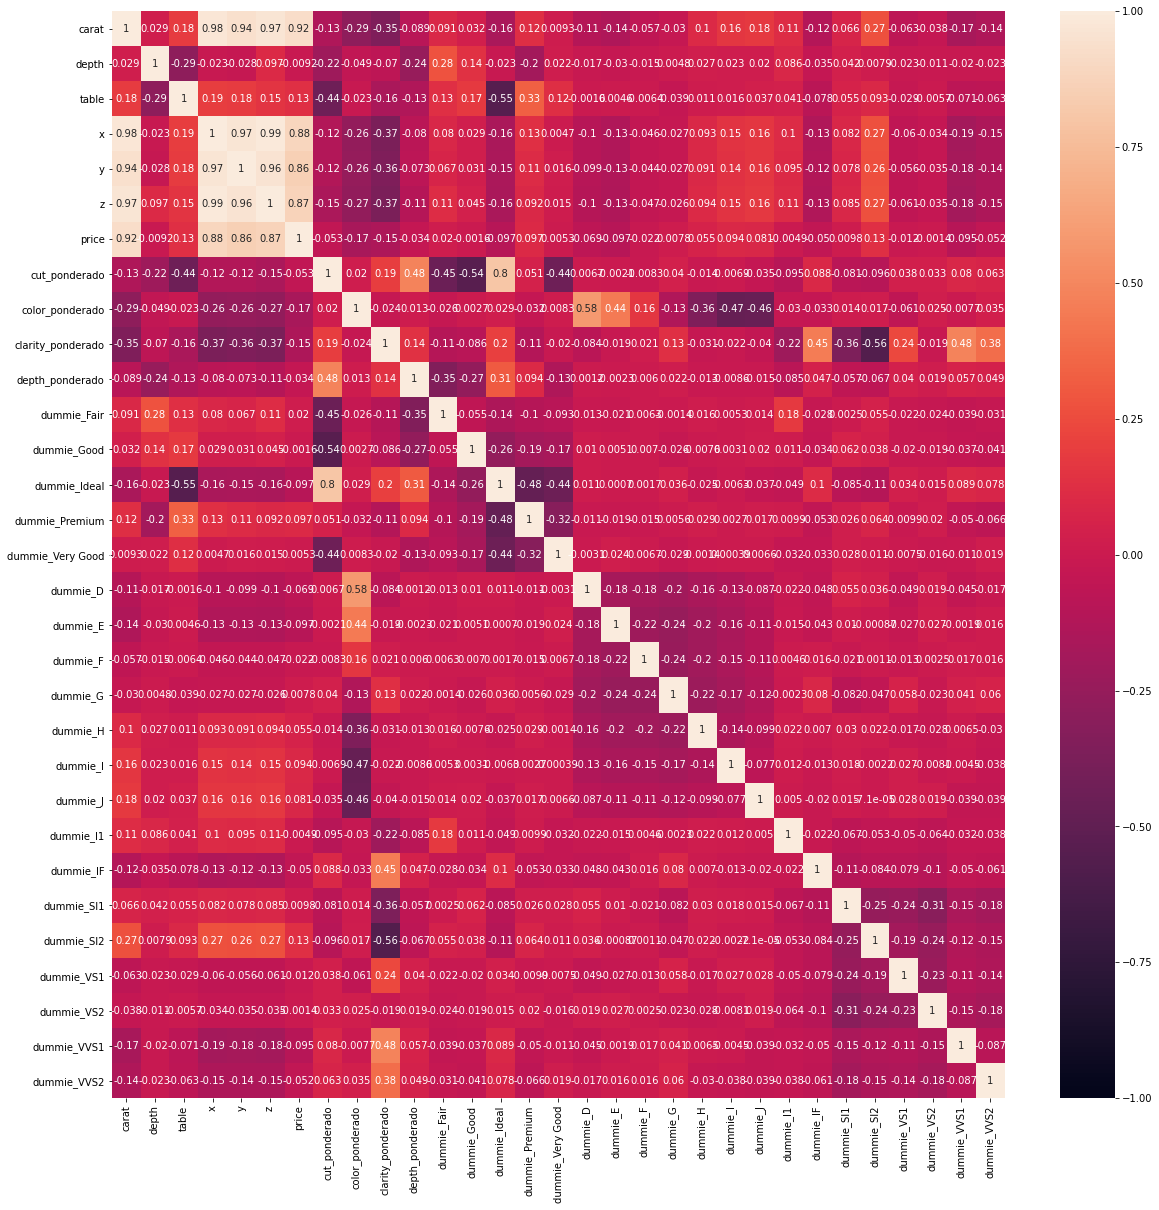

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True, vmax=1, vmin=-1);

In [28]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'cut_ponderado', 'color_ponderado', 'clarity_ponderado',
       'depth_ponderado', 'dummie_Fair', 'dummie_Good', 'dummie_Ideal',
       'dummie_Premium', 'dummie_Very Good', 'dummie_D', 'dummie_E',
       'dummie_F', 'dummie_G', 'dummie_H', 'dummie_I', 'dummie_J', 'dummie_I1',
       'dummie_IF', 'dummie_SI1', 'dummie_SI2', 'dummie_VS1', 'dummie_VS2',
       'dummie_VVS1', 'dummie_VVS2'],
      dtype='object')

In [29]:
lista_x = ['carat', 'cut_ponderado', 'color_ponderado', 'clarity_ponderado', 'depth_ponderado']
x = np.array(df[lista_x])
y =np.array(df.price)
print('x:', x.shape)
print('y:', y.shape)

x: (40345, 5)
y: (40345,)


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (32276, 5)
x_test: (8069, 5)
y_train: (32276,)
y_test: (8069,)


In [107]:
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42, warm_start=False)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
model_random_forest.score(x_train,y_train)

0.9924931884206338

In [109]:
model_random_forest.score(x_test,y_test)

0.9782664194191746

In [110]:
prediccion = model_random_forest.predict(x_test)
prediccion

array([5819.11671429, 3618.15281511,  669.48970447, ...,  501.78739365,
       5124.43778644, 2373.3895    ])

In [111]:
np.sqrt(mean_squared_error(y_test, prediccion))

587.6323473678699

In [112]:
model_random_forest.fit(x, y)

RandomForestRegressor(random_state=42)

In [113]:
prediccion_total = model_random_forest.predict(x)
prediccion_total

array([ 6322.178     ,   581.64228571,  1065.18976507, ...,
        1289.601     , 10035.473     ,  1251.2167833 ])

In [114]:
np.sqrt(mean_squared_error(y, prediccion_total))

355.6258057171018

In [31]:
df_test = pd.read_csv("data_diamonds/diamonds_test.csv", index_col=0)
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [32]:
cut_conditions_test = [(df_test.cut == 'Fair'), (df_test.cut == 'Good'), (df_test.cut == 'Very Good'), (df_test.cut == 'Premium'), (df_test.cut == 'Ideal')]
cut_eleccion_test = [1, 2, 3, 4, 5]
df_test['cut_ponderado'] = np.select(cut_conditions_test, cut_eleccion_test)

In [33]:
color_conditions_test = [(df_test.color == 'D'), (df_test.color == 'E'), (df_test.color == 'F'), (df_test.color == 'G'), (df_test.color == 'H'), (df_test.color == 'I'), (df_test.color == 'J')]
color_eleccion_test = [7, 6, 5, 4, 3, 2, 1]
df_test['color_ponderado'] = np.select(color_conditions_test, color_eleccion_test)

In [34]:
clarity_conditions_test = [(df_test.clarity == 'I1'), (df_test.clarity == 'SI2'), (df_test.clarity == 'SI1'), (df_test.clarity == 'VS2'), (df_test.clarity == 'VS1'), (df_test.clarity == 'VVS2'), (df_test.clarity == 'VVS1'), (df_test.clarity == 'IF')]
clarity_eleccion_test = [1, 2, 3, 4, 5, 6, 7, 8]
df_test['clarity_ponderado'] = np.select(clarity_conditions_test, clarity_eleccion_test)

In [35]:
depth_conditions_test =   [((df_test.depth > 59.5) & (df_test.depth < 62.9)),
                    ((df_test.depth > 56.2) & (df_test.depth < 59.5)) | ((df_test.depth > 62.9) & (df_test.depth < 65)), 
                    ((df_test.depth > 53.2) & (df_test.depth < 56.2)) | ((df_test.depth > 65) & (df_test.depth < 68))]
depth_eleccion_test = [4, 3, 2]
df_test['depth_ponderado'] = np.select(depth_conditions_test, depth_eleccion_test, default= 1)

In [36]:
dummies_cut_test = pd.get_dummies(df_test["cut"], prefix='dummie')
dummies_color_test = pd.get_dummies(df_test["color"], prefix='dummie')
dummies_clarity_test = pd.get_dummies(df_test["clarity"], prefix='dummie')

In [37]:
df_test = pd.concat([df_test, dummies_cut_test, dummies_color_test, dummies_clarity_test], axis = 1)
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_ponderado,...,dummie_I,dummie_J,dummie_I1,dummie_IF,dummie_SI1,dummie_SI2,dummie_VS1,dummie_VS2,dummie_VVS1,dummie_VVS2
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65,5,...,0,0,0,0,0,1,0,0,0,0
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79,5,...,0,0,0,1,0,0,0,0,0,0
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56,3,...,1,0,0,0,0,0,0,1,0,0
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68,5,...,0,0,0,0,0,0,0,1,0,0
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63,2,...,1,0,0,0,0,0,0,0,1,0


In [38]:
lista_x_test = ['carat', 'cut_ponderado', 'color_ponderado', 'clarity_ponderado', 'depth_ponderado']
x_predecir = np.array(df_test[lista_x_test])

In [39]:
x

array([[1.21, 5.  , 3.  , 4.  , 3.  ],
       [0.28, 3.  , 7.  , 6.  , 3.  ],
       [0.42, 4.  , 5.  , 5.  , 4.  ],
       ...,
       [0.57, 3.  , 2.  , 4.  , 4.  ],
       [1.01, 3.  , 5.  , 8.  , 4.  ],
       [0.54, 5.  , 6.  , 2.  , 4.  ]])

In [40]:
x_predecir

array([[0.3 , 5.  , 3.  , 2.  , 4.  ],
       [0.34, 5.  , 7.  , 8.  , 4.  ],
       [1.57, 3.  , 2.  , 4.  , 4.  ],
       ...,
       [1.5 , 4.  , 7.  , 4.  , 4.  ],
       [1.7 , 4.  , 5.  , 2.  , 4.  ],
       [0.3 , 5.  , 7.  , 4.  , 4.  ]])

In [125]:
prediccion_submit = model_random_forest.predict(x_predecir)
prediccion_submit

array([  412.39083103,  2276.74396825,  9503.34311905, ...,
       15015.07068254, 10897.68008333,   795.3676653 ])

In [41]:
sample = pd.read_csv("data_diamonds/sample_submission.csv")

In [127]:
sample.head()

,id,price
0,0,12132
1,1,11786
2,2,14684
3,3,15425
4,4,6724


In [128]:
submission = pd.DataFrame({"id": range(len(prediccion_submit)), "price": prediccion_submit})
submission.head()

,id,price
0,0,412.390831
1,1,2276.743968
2,2,9503.343119
3,3,546.124747
4,4,9200.230000


In [129]:
submission.shape

(13449, 2)

In [42]:
def chequeator(df_to_submit, nombre_archivo):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                df_to_submit.to_csv(nombre_archivo + '.csv', index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [131]:
chequeator(submission, 'submission')

You're ready to submit!


In [132]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price', 'cut_ponderado', 'color_ponderado', 'clarity_ponderado',
       'depth_ponderado', 'dummie_Fair', 'dummie_Good', 'dummie_Ideal',
       'dummie_Premium', 'dummie_Very Good', 'dummie_D', 'dummie_E',
       'dummie_F', 'dummie_G', 'dummie_H', 'dummie_I', 'dummie_J', 'dummie_I1',
       'dummie_IF', 'dummie_SI1', 'dummie_SI2', 'dummie_VS1', 'dummie_VS2',
       'dummie_VVS1', 'dummie_VVS2'],
      dtype='object')

---

# RandomForest Regressor --> Con todas las columnas (ponderadas, dummies, y demas)

In [133]:
x2 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x2.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_ponderado',
       'color_ponderado', 'clarity_ponderado', 'depth_ponderado',
       'dummie_Fair', 'dummie_Good', 'dummie_Ideal', 'dummie_Premium',
       'dummie_Very Good', 'dummie_D', 'dummie_E', 'dummie_F', 'dummie_G',
       'dummie_H', 'dummie_I', 'dummie_J', 'dummie_I1', 'dummie_IF',
       'dummie_SI1', 'dummie_SI2', 'dummie_VS1', 'dummie_VS2', 'dummie_VVS1',
       'dummie_VVS2'],
      dtype='object')

In [134]:
lista_x2 = list(x2.columns)

In [135]:
x2 = np.array(df[lista_x2])
y =np.array(df.price)
print('x2:', x2.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest2 = RandomForestRegressor(n_estimators=100, warm_start=False, random_state= 42)
model_random_forest2.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest2.score(x_train,y_train))
print('Score TEST:', model_random_forest2.score(x_test,y_test))
prediccion2 = model_random_forest2.predict(x_test)
prediccion2
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion2)))

x2: (40345, 30)
y: (40345,)
x_train: (32276, 30)
x_test: (8069, 30)
y_train: (32276,)
y_test: (8069,)
Score TRAIN: 0.9973220268698169
Score TEST: 0.9803645164192855
RMSE entrenado con TRAIN: 558.548454245338


In [136]:
model_random_forest2.fit(x2, y)
prediccion_total2 = model_random_forest2.predict(x2)
prediccion_total2

array([ 6143.93666667,   573.37      ,  1106.56      , ...,
        1300.42      , 10210.95      ,  1309.41      ])

In [137]:
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total2)))

RMSE entrenado con TOTALIDAD: 205.56505084177022


In [138]:
x_predecir2 = np.array(df_test[lista_x2])
x_predecir2

array([[ 0.3 , 60.  , 56.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.34, 62.1 , 57.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.57, 60.3 , 58.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.5 , 61.8 , 60.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.7 , 60.2 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.3 , 61.2 , 57.  , ...,  1.  ,  0.  ,  0.  ]])

In [139]:
prediccion_submit2 = model_random_forest2.predict(x_predecir2)
prediccion_submit2

array([  426.28,  2034.64,  9692.29, ..., 15086.39, 10379.04,   732.37])

In [140]:
submission2 = pd.DataFrame({"id": range(len(prediccion_submit2)), "price": prediccion_submit2})
submission2.head()

,id,price
0,0,426.28
1,1,2034.64
2,2,9692.29
3,3,489.03
4,4,8831.39


In [141]:
chequeator(submission2, 'submission2')

You're ready to submit!


array([[ 1.21, 63.  , 57.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.28, 64.  , 56.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.42, 61.2 , 58.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.57, 62.2 , 55.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.01, 59.6 , 62.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.54, 60.4 , 57.  , ...,  0.  ,  0.  ,  0.  ]])

---

# RandomForest Regressor (n_splits = 200 , max_depth = 20) --> Con todas las columnas (ponderadas, dummies, y demas)

In [142]:
x3 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x3.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_ponderado',
       'color_ponderado', 'clarity_ponderado', 'depth_ponderado',
       'dummie_Fair', 'dummie_Good', 'dummie_Ideal', 'dummie_Premium',
       'dummie_Very Good', 'dummie_D', 'dummie_E', 'dummie_F', 'dummie_G',
       'dummie_H', 'dummie_I', 'dummie_J', 'dummie_I1', 'dummie_IF',
       'dummie_SI1', 'dummie_SI2', 'dummie_VS1', 'dummie_VS2', 'dummie_VVS1',
       'dummie_VVS2'],
      dtype='object')

In [143]:
lista_x3 = list(x3.columns)

In [144]:
x3 = np.array(df[lista_x3])
y = np.array(df.price)
print('x3:', x3.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest3 = RandomForestRegressor(n_estimators=200, max_depth= 20,  warm_start=False, random_state= 42)
model_random_forest3.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest3.score(x_train,y_train))
print('Score TEST:', model_random_forest3.score(x_test,y_test))
prediccion3 = model_random_forest3.predict(x_test)
prediccion3
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion3)))

x3: (40345, 30)
y: (40345,)
x_train: (32276, 30)
x_test: (8069, 30)
y_train: (32276,)
y_test: (8069,)
Score TRAIN: 0.9972412917893781
Score TEST: 0.9802395724790036
RMSE entrenado con TRAIN: 560.3227059258122


In [145]:
model_random_forest3.fit(x3, y)
prediccion_total3 = model_random_forest3.predict(x3)
prediccion_total3

array([ 6183.44055556,   571.45792855,  1102.72349555, ...,
        1303.79      , 10255.655     ,  1292.19932702])

In [146]:
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total3)))

RMSE entrenado con TOTALIDAD: 210.9705658870105


In [147]:
x_predecir3 = np.array(df_test[lista_x3])
x_predecir3

array([[ 0.3 , 60.  , 56.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.34, 62.1 , 57.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.57, 60.3 , 58.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.5 , 61.8 , 60.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.7 , 60.2 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.3 , 61.2 , 57.  , ...,  1.  ,  0.  ,  0.  ]])

In [148]:
prediccion_submit3 = model_random_forest3.predict(x_predecir3)
prediccion_submit3

array([  430.1925    ,  1880.42      ,  9664.04930611, ...,
       15076.94915845, 10385.08607143,   730.50177251])

In [149]:
submission3 = pd.DataFrame({"id": range(len(prediccion_submit3)), "price": prediccion_submit3})
submission3.head()

,id,price
0,0,430.192500
1,1,1880.420000
2,2,9664.049306
3,3,492.558508
4,4,8852.655000


In [150]:
chequeator(submission3, 'submission3')

You're ready to submit!


---

# RandomForest Regressor (n_splits = 200 , max_depth = 30) --> Con todas las columnas (ponderadas, dummies, y demas)

In [157]:
x4 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x4.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_ponderado',
       'color_ponderado', 'clarity_ponderado', 'depth_ponderado',
       'dummie_Fair', 'dummie_Good', 'dummie_Ideal', 'dummie_Premium',
       'dummie_Very Good', 'dummie_D', 'dummie_E', 'dummie_F', 'dummie_G',
       'dummie_H', 'dummie_I', 'dummie_J', 'dummie_I1', 'dummie_IF',
       'dummie_SI1', 'dummie_SI2', 'dummie_VS1', 'dummie_VS2', 'dummie_VVS1',
       'dummie_VVS2'],
      dtype='object')

In [158]:
lista_x4 = list(x4.columns)

In [160]:
x4 = np.array(df[lista_x4])
y = np.array(df.price)
print('x4:', x4.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest4 = RandomForestRegressor(n_estimators=200, max_depth= 30,  warm_start=False, random_state= 42)
model_random_forest4.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest4.score(x_train,y_train))
print('Score TEST:', model_random_forest4.score(x_test,y_test))
prediccion4 = model_random_forest4.predict(x_test)
prediccion4
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion4)))

x4: (40345, 30)
y: (40345,)
x_train: (32276, 30)
x_test: (8069, 30)
y_train: (32276,)
y_test: (8069,)
Score TRAIN: 0.9973573508103497
Score TEST: 0.9801939831732449
RMSE entrenado con TRAIN: 560.9686941399593


In [161]:
model_random_forest4.fit(x4, y)
prediccion_total4 = model_random_forest4.predict(x4)
prediccion_total4

array([ 6178.81333333,   569.14      ,  1104.435     , ...,
        1304.035     , 10263.4       ,  1294.825     ])

In [162]:
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total4)))

RMSE entrenado con TOTALIDAD: 202.94878011791138


In [163]:
x_predecir4 = np.array(df_test[lista_x4])
x_predecir4

array([[ 0.3 , 60.  , 56.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.34, 62.1 , 57.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.57, 60.3 , 58.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.5 , 61.8 , 60.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.7 , 60.2 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.3 , 61.2 , 57.  , ...,  1.  ,  0.  ,  0.  ]])

In [164]:
prediccion_submit4 = model_random_forest4.predict(x_predecir4)
prediccion_submit4

array([  428.52 ,  1906.32 ,  9656.325, ..., 15042.645, 10296.125,
         730.065])

In [165]:
submission4 = pd.DataFrame({"id": range(len(prediccion_submit4)), "price": prediccion_submit4})
submission4.head()

,id,price
0,0,428.520
1,1,1906.320
2,2,9656.325
3,3,493.975
4,4,8897.420


In [166]:
chequeator(submission4, 'submission4')

You're ready to submit!


# EL MEJOR

In [43]:
x5 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x5.columns
lista_x5 = list(x5.columns)
x5 = np.array(df[lista_x5])
y = np.array(df.price)
print('x5:', x5.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x5, y, test_size=0.15, random_state=43)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest5 = RandomForestRegressor(n_estimators=200, max_depth= 30, warm_start=False, random_state= 43)
model_random_forest5.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest5.score(x_train,y_train))
print('Score TEST:', model_random_forest5.score(x_test,y_test))
prediccion5 = model_random_forest5.predict(x_test)
prediccion5
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion5)))
model_random_forest5.fit(x5, y)
prediccion_total5 = model_random_forest5.predict(x5)
prediccion_total5
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total5)))
x_predecir5 = np.array(df_test[lista_x5])
x_predecir5
prediccion_submit5 = model_random_forest5.predict(x_predecir5)
prediccion_submit5
submission5 = pd.DataFrame({"id": range(len(prediccion_submit5)), "price": prediccion_submit5})
submission5.head()

x5: (40345, 30)
y: (40345,)
x_train: (34293, 30)
x_test: (6052, 30)
y_train: (34293,)
y_test: (6052,)
Score TRAIN: 0.9973300970430747
Score TEST: 0.9809983722256084
RMSE entrenado con TRAIN: 555.3555886207192
RMSE entrenado con TOTALIDAD: 202.67331135207428


,id,price
0,0,416.440
1,1,1793.010
2,2,9742.265
3,3,491.745
4,4,8911.400


In [282]:
chequeator(submission5, 'submission7')

You're ready to submit!


In [50]:
x5 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x5.columns
lista_x5 = list(x5.columns)
x5 = np.array(df[lista_x5])
y = np.array(df.price)
print('x5:', x5.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x5, y, test_size=0.13, random_state=44)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest5 = RandomForestRegressor(n_estimators = 210, max_depth= 30, warm_start=False, random_state= 44)
model_random_forest5.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest5.score(x_train,y_train))
print('Score TEST:', model_random_forest5.score(x_test,y_test))
prediccion5 = model_random_forest5.predict(x_test)
prediccion5
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion5)))
model_random_forest5.fit(x5, y)
prediccion_total5 = model_random_forest5.predict(x5)
prediccion_total5
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total5)))
x_predecir5 = np.array(df_test[lista_x5])
x_predecir5
prediccion_submit5 = model_random_forest5.predict(x_predecir5)
prediccion_submit5
submission5 = pd.DataFrame({"id": range(len(prediccion_submit5)), "price": prediccion_submit5})
submission5.head()

x5: (40345, 30)
y: (40345,)
x_train: (35100, 30)
x_test: (5245, 30)
y_train: (35100,)
y_test: (5245,)
Score TRAIN: 0.9973833988877766
Score TEST: 0.9799742665232258
RMSE entrenado con TRAIN: 556.1460345343661
RMSE entrenado con TOTALIDAD: 201.94149114834846


,id,price
0,0,421.309524
1,1,1863.404762
2,2,9602.652381
3,3,494.342857
4,4,8915.366667


In [51]:
chequeator(submission5, 'submission11')

You're ready to submit!


---

In [ ]:
x5 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x5.columns
lista_x5 = list(x5.columns)
x5 = np.array(df[lista_x5])
y = np.array(df.price)
print('x5:', x5.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x5, y, test_size=0.15, random_state=43)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest5 = RandomForestRegressor(n_estimators=200, max_depth= 30, warm_start=False, random_state= 43)
model_random_forest5.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest5.score(x_train,y_train))
print('Score TEST:', model_random_forest5.score(x_test,y_test))
prediccion5 = model_random_forest5.predict(x_test)
prediccion5
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion5)))
model_random_forest5.fit(x5, y)
prediccion_total5 = model_random_forest5.predict(x5)
prediccion_total5
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total5)))
x_predecir5 = np.array(df_test[lista_x5])
x_predecir5
prediccion_submit5 = model_random_forest5.predict(x_predecir5)
prediccion_submit5
submission5 = pd.DataFrame({"id": range(len(prediccion_submit5)), "price": prediccion_submit5})
submission5.head()

In [ ]:
--- 

# 

In [276]:
df_2 = pd.read_csv("data_diamonds/diamonds_train.csv", index_col=0)

#==============================================================================================================================================================================

cut_conditions_2 = [(df_2.cut == 'Fair'), (df_2.cut == 'Good'), (df_2.cut == 'Very Good'), (df_2.cut == 'Premium'), (df_2.cut == 'Ideal')]
cut_eleccion_2 = [1, 1.1, 1.3, 1.6, 2]
df_2['cut_ponderado'] = np.select(cut_conditions_2, cut_eleccion_2)

#==============================================================================================================================================================================

color_conditions_2 = [(df_2.color == 'D'), (df_2.color == 'E'), (df_2.color == 'F'), (df_2.color == 'G'), (df_2.color == 'H'), (df_2.color == 'I'), (df_2.color == 'J')]
color_eleccion_2 = [3.1, 2.5, 2, 1.6, 1.3, 1.1, 1]
df_2['color_ponderado'] = np.select(color_conditions_2, color_eleccion_2)

#==============================================================================================================================================================================

clarity_conditions_2 = [(df_2.clarity == 'I1'), (df_2.clarity == 'SI2'), (df_2.clarity == 'SI1'), (df_2.clarity == 'VS2'), (df_2.clarity == 'VS1'), (df_2.clarity == 'VVS2'), (df_2.clarity == 'VVS1'), (df_2.clarity == 'IF')]
clarity_eleccion_2 = [1, 1.1, 1.3, 1.6, 2, 2.5, 3.1, 3.8]
df_2['clarity_ponderado'] = np.select(clarity_conditions_2, clarity_eleccion_2)

#==============================================================================================================================================================================

depth_conditions_2 =   [((df_2.depth > 59.5) & (df_2.depth < 62.9)),
                    ((df_2.depth > 56.2) & (df_2.depth < 59.5)) | ((df_2.depth > 62.9) & (df_2.depth < 65)), 
                    ((df_2.depth > 53.2) & (df_2.depth < 56.2)) | ((df_2.depth > 65) & (df_2.depth < 68))]
depth_eleccion_2 = [1.6, 1.3, 1.1]
df_2['depth_ponderado'] = np.select(depth_conditions_2, depth_eleccion_2, default= 1)

#==============================================================================================================================================================================

dummies_cut_2 = pd.get_dummies(df_2["cut"], prefix='dummie')
dummies_color_2 = pd.get_dummies(df_2["color"], prefix='dummie')
dummies_clarity_2 = pd.get_dummies(df_2["clarity"], prefix='dummie')

#==============================================================================================================================================================================

df_2 = pd.concat([df_2, dummies_cut_2, dummies_color_2, dummies_clarity_2], axis = 1)
df_2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,...,dummie_I,dummie_J,dummie_I1,dummie_IF,dummie_SI1,dummie_SI2,dummie_VS1,dummie_VS2,dummie_VVS1,dummie_VVS2
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,...,0,0,0,0,0,0,0,1,0,0
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,...,0,0,0,0,0,0,0,0,0,1
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,...,0,0,0,0,0,0,1,0,0,0
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,...,0,0,0,1,0,0,0,0,0,0
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,...,0,0,0,0,1,0,0,0,0,0


In [277]:
df_test_2 = pd.read_csv("data_diamonds/diamonds_test.csv", index_col=0)

#==============================================================================================================================================================================

cut_conditions_test_2 = [(df_test_2.cut == 'Fair'), (df_test_2.cut == 'Good'), (df_test_2.cut == 'Very Good'), (df_test_2.cut == 'Premium'), (df_test_2.cut == 'Ideal')]
cut_eleccion_test_2 = [1, 1.1, 1.3, 1.6, 2]
df_test_2['cut_ponderado'] = np.select(cut_conditions_test_2, cut_eleccion_test_2)

#==============================================================================================================================================================================

color_conditions_test_2 = [(df_test_2.color == 'D'), (df_test_2.color == 'E'), (df_test_2.color == 'F'), (df_test_2.color == 'G'), (df_test_2.color == 'H'), (df_test_2.color == 'I'), (df_test_2.color == 'J')]
color_eleccion_test_2 = [3.1, 2.5, 2, 1.6, 1.3, 1.1, 1]
df_test_2['color_ponderado'] = np.select(color_conditions_test_2, color_eleccion_test_2)

#==============================================================================================================================================================================

clarity_conditions_test_2 = [(df_test_2.clarity == 'I1'), (df_test_2.clarity == 'SI2'), (df_test_2.clarity == 'SI1'), (df_test_2.clarity == 'VS2'), (df_test_2.clarity == 'VS1'), (df_test_2.clarity == 'VVS2'), (df_test_2.clarity == 'VVS1'), (df_test_2.clarity == 'IF')]
clarity_eleccion_test_2 = [1, 1.1, 1.3, 1.6, 2, 2.5, 3.1, 3.8]
df_test_2['clarity_ponderado'] = np.select(clarity_conditions_test_2, clarity_eleccion_test_2)

#==============================================================================================================================================================================

depth_conditions_test_2 =   [((df_test_2.depth > 59.5) & (df_test_2.depth < 62.9)),
                    ((df_test_2.depth > 56.2) & (df_test_2.depth < 59.5)) | ((df_test_2.depth > 62.9) & (df_test_2.depth < 65)), 
                    ((df_test_2.depth > 53.2) & (df_test_2.depth < 56.2)) | ((df_test_2.depth > 65) & (df_test_2.depth < 68))]
depth_eleccion_test_2 = [1.6, 1.3, 1.1]
df_test_2['depth_ponderado'] = np.select(depth_conditions_test_2, depth_eleccion_test_2, default= 1)

#==============================================================================================================================================================================

dummies_cut_test_2 = pd.get_dummies(df_test_2["cut"], prefix='dummie')
dummies_color_test_2 = pd.get_dummies(df_test_2["color"], prefix='dummie')
dummies_clarity_test_2 = pd.get_dummies(df_test_2["clarity"], prefix='dummie')

#==============================================================================================================================================================================

df_test_2 = pd.concat([df_test_2, dummies_cut_test_2, dummies_color_test_2, dummies_clarity_test_2], axis = 1)
df_test_2.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_ponderado,...,dummie_I,dummie_J,dummie_I1,dummie_IF,dummie_SI1,dummie_SI2,dummie_VS1,dummie_VS2,dummie_VVS1,dummie_VVS2
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65,2.0,...,0,0,0,0,0,1,0,0,0,0
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79,2.0,...,0,0,0,1,0,0,0,0,0,0
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56,1.3,...,1,0,0,0,0,0,0,1,0,0
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68,2.0,...,0,0,0,0,0,0,0,1,0,0
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63,1.1,...,1,0,0,0,0,0,0,0,1,0


In [278]:
x4_2 = df_2.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x4_2.columns
lista_x4_2 = list(x4_2.columns)
x4_2 = np.array(df[lista_x4_2])
y = np.array(df.price)
print('x4_2:', x4_2.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x4_2, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest4_2 = RandomForestRegressor(n_estimators=200, max_depth= 30,  warm_start=True, random_state= 42)
model_random_forest4_2.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest4_2.score(x_train,y_train))
print('Score TEST:', model_random_forest4_2.score(x_test,y_test))
prediccion4_2 = model_random_forest4_2.predict(x_test)
prediccion4_2
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion4_2)))
model_random_forest4_2.fit(x4_2, y)
prediccion_total4_2 = model_random_forest4_2.predict(x4_2)
prediccion_total4_2
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total4_2)))
x_predecir4_2 = np.array(df_test[lista_x4_2])
x_predecir4_2
prediccion_submit4_2 = model_random_forest4_2.predict(x_predecir4_2)
prediccion_submit4_2
submission4_2 = pd.DataFrame({"id": range(len(prediccion_submit4_2)), "price": prediccion_submit4_2})
submission4_2.head()

x4_2: (40345, 30)
y: (40345,)
x_train: (32276, 30)
x_test: (8069, 30)
y_train: (32276,)
y_test: (8069,)
Score TRAIN: 0.9973573508103497
Score TEST: 0.9801939831732449
RMSE entrenado con TRAIN: 560.9686941399593
C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
RMSE entrenado con TOTALIDAD: 310.54977090113806


,id,price
0,0,429.180
1,1,1805.225
2,2,9786.670
3,3,493.035
4,4,8808.575


In [275]:
chequeator(submission4_2, 'submission4_2_2')

You're ready to submit!


---

# n_estimators

In [219]:
import os, pickle

In [243]:
x4 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x4.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_ponderado',
       'color_ponderado', 'clarity_ponderado', 'depth_ponderado',
       'dummie_Fair', 'dummie_Good', 'dummie_Ideal', 'dummie_Premium',
       'dummie_Very Good', 'dummie_D', 'dummie_E', 'dummie_F', 'dummie_G',
       'dummie_H', 'dummie_I', 'dummie_J', 'dummie_I1', 'dummie_IF',
       'dummie_SI1', 'dummie_SI2', 'dummie_VS1', 'dummie_VS2', 'dummie_VVS1',
       'dummie_VVS2'],
      dtype='object')

In [251]:
x4 = np.array(x4)
print('x4.shape:',x4.shape)
print('y.shape:', y.shape)

x4.shape: (40345, 30)
y.shape: (40345,)


In [237]:
k_fold = RepeatedKFold(n_splits= 10, n_repeats=2, random_state=42)

In [238]:
model_random_forest_warm = RandomForestRegressor(n_estimators= 100, max_depth=30, warm_start=True, random_state=42)

In [234]:
path = os.getcwd() + os.sep

(32276, 30)

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=42)
print('x_train.shape =', x_train.shape)
print('x_test.shape =', x_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (32276, 30)
x_test.shape = (8069, 30)
y_train.shape = (32276,)
y_test.shape = (8069,)


In [269]:
val_score = []
train_score = []
for i, (train, val) in enumerate(k_fold.split(x_train)):
    print("Iteración:", i+1)
    print("train/índices batch:", train)
    print("batch_size:", len(train))
    #print("val:", val)
    print("val_size:", len(val))
    model_random_forest_warm.fit(x_train[train], y_train[train])

    model_random_forest_warm.n_estimators +=100

    score_val = model_random_forest_warm.score(x_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model_random_forest_warm.score(x_train[train], y_train[train])
    train_score.append(score_train)
    print("score_train:", score_train)
    print("score_val:", score_val)

    if i % 4 == 0: 
        pickle.dump(model_random_forest_warm, open(path + "model_saved.sav" , "wb"))
    
    if score_val < np.mean(val_score) // 2:
        print("Se ha encontrado una bajada importante de accuracy en validación")
        print("Este es el responsable:")
        print(X_train[val])
        break 

    if np.mean(val_score) >= 0.99 and len(val_score) > 5:
        pickle.dump(model_random_forest_warm, open(path + "model_saved" + str(i) + ".sav" , "wb"))
        print("STOP")
        break
    print('\n=====================\n')


Iteración: 1
train/índices batch: [    0     1     2 ... 32272 32274 32275]
batch_size: 29048
val_size: 3228
score_train: 0.996629301383958
score_val: 0.994412553787405


Iteración: 2
train/índices batch: [    0     1     2 ... 32273 32274 32275]
batch_size: 29048
val_size: 3228
score_train: 0.9965334727232699
score_val: 0.9952205494451167


Iteración: 3
train/índices batch: [    0     1     2 ... 32273 32274 32275]
batch_size: 29048
val_size: 3228
score_train: 0.9965525424698967
score_val: 0.9950335508048587


Iteración: 4
train/índices batch: [    0     1     2 ... 32273 32274 32275]
batch_size: 29048
val_size: 3228
score_train: 0.9964773832724135
score_val: 0.9958860557420404


Iteración: 5
train/índices batch: [    1     2     3 ... 32273 32274 32275]
batch_size: 29048
val_size: 3228
score_train: 0.9965206325514621
score_val: 0.9954945360802462


MemoryError: 

In [271]:
modelo_0 = pickle.load(open(path + 'model_saved.sav0', 'rb'))
modelo_0

MemoryError: 

In [260]:
prediccion_test_modelo_0 = modelo_0.predict(x_test)
prediccion_test_modelo_0

array([5837.54714286, 3492.83857143,  615.04857143, ...,  499.45714286,
       5126.98315476, 2339.15      ])

In [261]:
print('RMSE prediccion test modelo 0:', np.sqrt(mean_squared_error(y_test, prediccion_test_modelo_5)))

RMSE prediccion test modelo 0: 5546.512555029861


In [ ]:
x6 = df.drop(['price', 'cut', 'color', 'clarity'], axis=1)
x6.columns
lista_x6 = list(x6.columns)
x6 = np.array(df[lista_x6])
y = np.array(df.price)
print('x6:', x6.shape)
print('y:', y.shape)
x_train, x_test, y_train, y_test = train_test_split(x6, y, test_size=0.2, random_state=42)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
model_random_forest6 = RandomForestRegressor(n_estimators=200, max_depth= 30, warm_start=True, random_state= 42)
model_random_forest6.fit(x_train, y_train)
print('Score TRAIN:', model_random_forest6.score(x_train,y_train))
print('Score TEST:', model_random_forest6.score(x_test,y_test))
prediccion6 = model_random_forest6.predict(x_test)
prediccion6
print('RMSE entrenado con TRAIN:', np.sqrt(mean_squared_error(y_test, prediccion6)))
model_random_forest6.fit(x6, y)
prediccion_total6 = model_random_forest6.predict(x6)
prediccion_total6
print('RMSE entrenado con TOTALIDAD:', np.sqrt(mean_squared_error(y, prediccion_total6)))
x_predecir6 = np.array(df_test[lista_x6])
x_predecir6
prediccion_submit6 = model_random_forest6.predict(x_predecir6)
prediccion_submit6
submission6 = pd.DataFrame({"id": range(len(prediccion_submit6)), "price": prediccion_submit6})
submission6.head()

In [213]:
chequeator(submission4_2, 'submission4_2')

You're ready to submit!


# Resultados de cada modelo

In [214]:
print('RMSE Train 1:', np.sqrt(mean_squared_error(y_test, prediccion)))
print('RMSE Total 1:', np.sqrt(mean_squared_error(y, prediccion_total)))
print('\n===============================\n')
print('RMSE Train 2:', np.sqrt(mean_squared_error(y_test, prediccion2)))
print('RMSE Total 2:', np.sqrt(mean_squared_error(y, prediccion_total2)))
print('\n===============================\n')
print('RMSE Train 3:', np.sqrt(mean_squared_error(y_test, prediccion3)))
print('RMSE Total 3:', np.sqrt(mean_squared_error(y, prediccion_total3)))
print('\n===============================\n')
print('RMSE Train 4:', np.sqrt(mean_squared_error(y_test, prediccion4)))
print('RMSE Total 4:', np.sqrt(mean_squared_error(y, prediccion_total4)))
print('\n===============================\n')
print('RMSE Train 4_2:', np.sqrt(mean_squared_error(y_test, prediccion4_2)))
print('RMSE Total 4_2:', np.sqrt(mean_squared_error(y, prediccion_total4_2)))
print('\n===============================\n')

RMSE Train 1: 587.6323473678699
RMSE Total 1: 355.6258057171018


RMSE Train 2: 558.548454245338
RMSE Total 2: 205.56505084177022


RMSE Train 3: 560.3227059258122
RMSE Total 3: 210.9705658870105


RMSE Train 4: 560.9686941399593
RMSE Total 4: 202.94878011791138


RMSE Train 4_2: 560.9686941399593
RMSE Total 4_2: 202.94878011791138


